In [1]:
#Prabhat Thakur  Date 10/21/2018
#MSDS422 - Assignment3

In [2]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

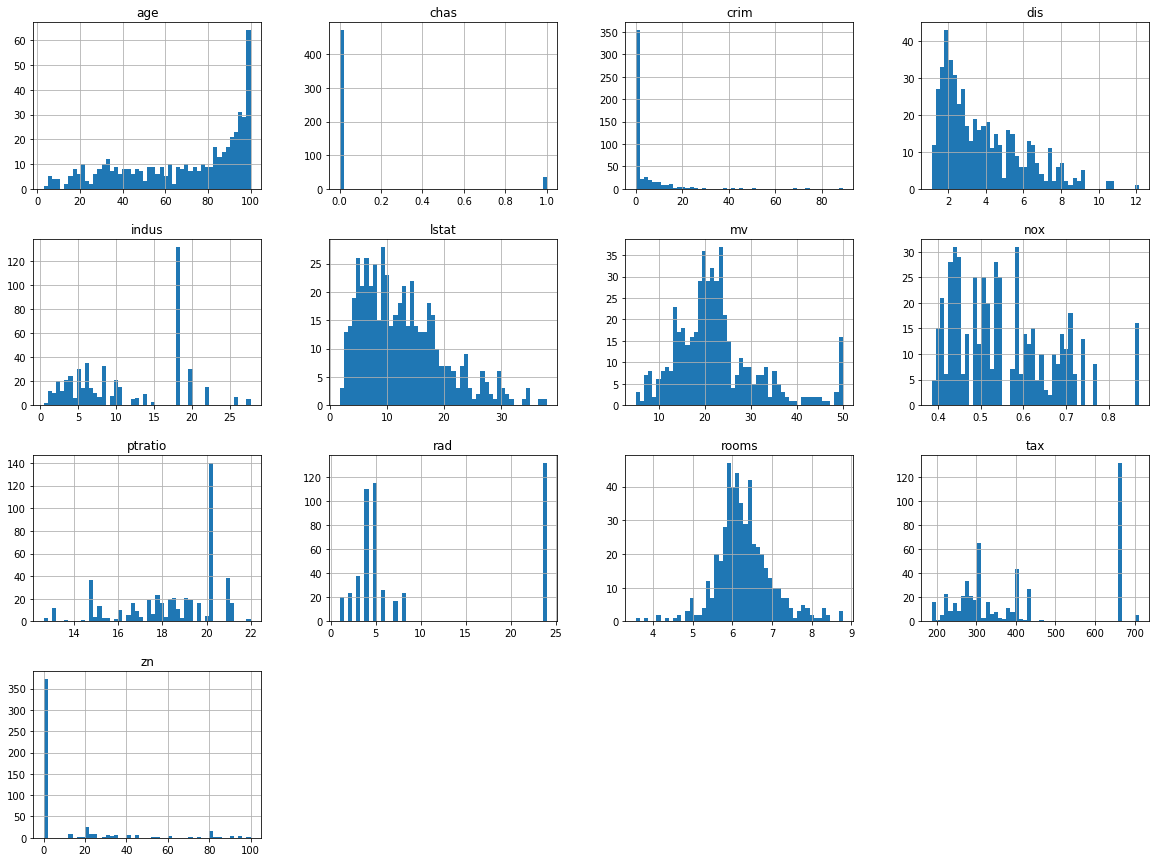

In [3]:
boston.hist(bins=50, figsize=(20,15))
plt.show()


In [4]:
corr_matrix = boston.corr()
corr_matrix["mv"].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AD6B513C8>,
      dtype=object)

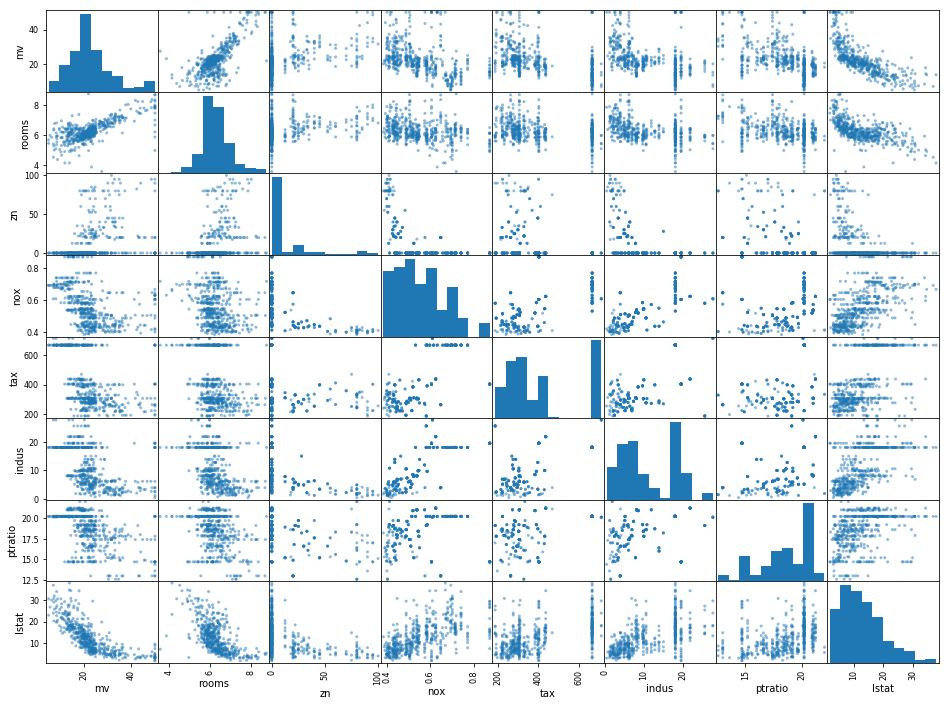

In [5]:
#let’s just focus on a few promising attributes that seem most correlated with the Median value of homes
from pandas.tools.plotting import scatter_matrix
attributes = ["mv", "rooms", "zn","nox", "tax","indus","ptratio","lstat"]
scatter_matrix(boston[attributes], figsize=(16, 12))


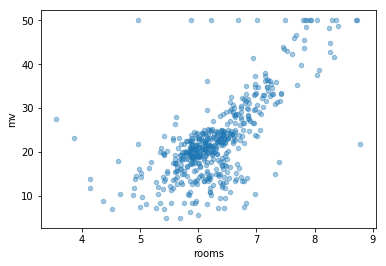

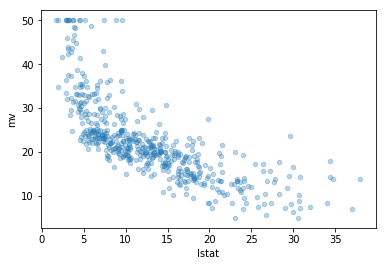

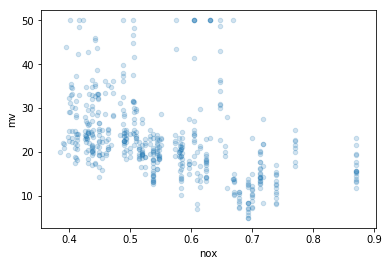

In [12]:
#The most promising attribute to predict the median house value is the rooms and istat and nox.
#so let’s zoom in on their correlation scatterplot:
boston.plot(kind="scatter", x="rooms", y="mv", alpha=0.4)
boston.plot(kind="scatter", x="lstat", y="mv", alpha=0.3)
boston.plot(kind="scatter", x="nox", y="mv", alpha=0.2)

In [7]:
SET_FIT_INTERCEPT = True

names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'ElasticNet_Regression'] 

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 1, solver = 'cholesky', fit_intercept = SET_FIT_INTERCEPT, normalize = False, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, random_state = RANDOM_SEED)]

In [8]:
model_data_features = model_data[:, 1:model_data.shape[1]]
model_data_label = model_data[:, 0]
    
for name, reg_model in zip(names, regressors):
    print('\nRegression model evaluation for:', name)
    print('  Scikit Learn method:', reg_model)
    reg_model.fit(model_data_features, model_data_label)  # fit on the entire set.
    print('Fitted regression intercept:', reg_model.intercept_)
    print('Fitted regression coefficients:', reg_model.coef_)
 
    # evaluate on model
    model_data_predict = reg_model.predict(model_data_features)
    print('Coefficient of determination (R-squared):', r2_score(model_data_label, model_data_predict))
    method_result = sqrt(mean_squared_error(model_data_label, model_data_predict))
    print(reg_model.get_params(deep=True))
    print('Root mean-squared error:', method_result)


Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitted regression intercept: -7.885833626790786e-16
Fitted regression coefficients: [-0.11190416  0.12258362  0.01212219  0.07865908 -0.23630884  0.27845548
  0.01062939 -0.34785185  0.27240671 -0.23951024 -0.21428199 -0.43371201]
Coefficient of determination (R-squared): 0.7382022164245633
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 0.5116617863153713

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression intercept: -7.867521023487571e-16
Fitted regression coefficients: [-0.11100258  0.12085009  0.00956054  0.07902034 -0.23321465  0.27950712
  0.00983117 -0.34482583  0.26475117 -0.23228694 -0.21344001 -0.43211988]
Coeff

In [9]:
# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
    #   the structure of modeling data for this study has the
    #   response variable coming first and explanatory variables later          
    #   so 1:model_data.shape[1] slices for explanatory variables
    #   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        #print('Fitted regression intercept:', reg_model.intercept_)
        #print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        #print('Coefficient of determination (R-squared):', r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Results from ', N_FOLDS, '-fold cross-validation\n')
print(cv_results_df.describe()) 

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
 
print(cv_results_df.mean())  

 


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 0.3080338355432656

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.3067444723142137

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
  

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 0.34382818519793323

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.3414825024396846

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.01, warm_start=False)
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared er

In [10]:
# Use GridSearch view to find Best Parameters for all 4 models
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'fit_intercept': [True,False], 'normalize': [True,False]}]
for name, reg_model in zip(names, regressors):
    print('\nRegression model evaluation for:', name)
    #print('  Scikit Learn method:', reg_model)
    grid_search = GridSearchCV(reg_model, param_grid, cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(model_data_features, model_data_label)  
    print('Best Parameters:\n', grid_search.best_params_)
    print('Best Estimatores:\n',grid_search.best_estimator_)



Regression model evaluation for: Linear_Regression
Best Parameters:
 {'fit_intercept': False, 'normalize': True}
Best Estimatores:
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

Regression model evaluation for: Ridge_Regression
Best Parameters:
 {'fit_intercept': False, 'normalize': True}
Best Estimatores:
 Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=True, random_state=1, solver='cholesky', tol=0.001)

Regression model evaluation for: Lasso_Regression
Best Parameters:
 {'fit_intercept': False, 'normalize': True}
Best Estimatores:
 Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.01, warm_start=False)

Regression model evaluation for: ElasticNet_Regression
Best Parameters:
 {'fit_intercept': False, 'normalize': True}
Best Estimatores:
 ElasticNet(alpha=0.1, copy_X=True, fit_intercept=False, l1_ratio=0.5,
   

In [11]:
#lets calculate the performance using these new hyperparameter values 'fit_intercept': False, 'normalize': True
SET_FIT_INTERCEPT = False

names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'ElasticNet_Regression'] 

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT,normalize = True),
              Ridge(alpha = 1, solver = 'cholesky', fit_intercept = SET_FIT_INTERCEPT, normalize = True, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, fit_intercept = SET_FIT_INTERCEPT,normalize = True, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = True, random_state = RANDOM_SEED)]

N_FOLDS = 10
# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    
    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
 
print(cv_results_df.mean())  



----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression        0.554743
Ridge_Regression         0.553367
Lasso_Regression         0.573452
ElasticNet_Regression    0.556858
dtype: float64
